# Data Analysis

**Import Libraries**

In [1]:
# Import Relevant Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
# Import Relevant Libraries
import sys
# Add Path to Project Files 
sys.path.append('/Users/Masa/Documents/Data Science/Metis/6. Projects/Project-McNulty/python')
sys.path.append('/Users/Masa/Documents/Data Science/Metis/6. Projects/Project-McNulty/python/mklearn')

**Import Project Python Modules**

In [4]:
# Import Python File
import data_visualization as dv
import data_import as di

**Import TFLearn**

In [5]:
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

## Import Data

**Import Labeled Data**

In [6]:
df = di.create_dataframe()

In [7]:
# Preview Data
df.head(n=3)

,Labels,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,59,43,50,68,98,119,139,145,149,...,59,58,65,59,46,57,104,140,84,72
1,9,154,126,105,102,125,155,172,180,142,...,22,42,67,101,122,133,136,139,142,144
2,9,255,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84


In [8]:
df_sorted = df.sort_values(by='Labels').reset_index(drop=True)

In [9]:
# Preview Data
df_sorted.head(n=3)

,Labels,0,1,2,3,4,5,6,7,8,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0,112,109,108,106,102,99,99,99,99,...,35,45,63,80,70,61,62,60,74,89
1,0,184,182,182,184,185,186,186,187,187,...,139,139,138,134,133,133,133,133,133,136
2,0,202,200,200,200,200,200,200,201,201,...,76,74,74,76,77,77,74,74,74,75


**Target Classes**

In [10]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

**Define X (Features) & Y (Target)**

In [11]:
X = df_sorted.iloc[:,1:]

In [12]:
y = df_sorted.iloc[:,0]

**Create RBF Arrays**

In [13]:
rbf = di.create_rbf_array(df)

In [14]:
rbf_sorted = di.create_rbf_array_sorted(df)

# Create Models

**Standardize X (Features)**

In [15]:
X_scale = pd.DataFrame(scale(X))

**Train Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.02, random_state=2)
X_val = X_train.iloc[:1000,:]
y_val = y_train.iloc[:1000]
X_train = X_train.iloc[1000:,:]
y_train = y_train.iloc[1000:]

**Format Data for TensorFlow Input**

In [17]:
X_train_array = np.array(X_train).reshape(48000,3,32,32).transpose(0,2,3,1)
X_val_array = np.array(X_val).reshape(1000,3,32,32).transpose(0,2,3,1)
X_test_array = np.array(X_test).reshape(1000,3,32,32).transpose(0,2,3,1)

y_train_array = to_categorical(np.array(y_train), 10)
y_val_array = to_categorical(np.array(y_val),10)
y_test_array = to_categorical(np.array(y_test),10)

## Create Convolutional Neural Net Model Using TFLearn

## Iteration 1

In [24]:
# Convolutions
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

# Create Network Architecture
network = input_data(shape=[None, 32, 32, 3],
                             data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Create Model
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(X_train_array, y_train_array, n_epoch=50, shuffle=True, validation_set=(X_val_array, y_val_array),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

Training Step: 25000  | total loss: 0.35022
| Adam | epoch: 050 | loss: 0.35022 - acc: 0.8749 | val_loss: 0.62294 - val_acc: 0.8330 -- iter: 48000/48000
Training Step: 25000  | total loss: 0.35022
| Adam | epoch: 050 | loss: 0.35022 - acc: 0.8749 | val_loss: 0.62294 - val_acc: 0.8330 -- iter: 48000/48000
--


**Predicted Probabilites for Each Class**

In [31]:
y_pred_prob = model.predict(X_test_array)

**Predicted Target Class**

In [32]:
y_pred = [np.argmax(predictions) for predictions in y_pred_prob]

**Accuracy**

In [37]:
accuracy = sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.814


In [38]:
y_pred_prob

[[0.00017051414761226624,
  1.5508122563900884e-09,
  7.5601687967719045e-06,
  0.00016952976875472814,
  0.9995383024215698,
  2.4773819404799724e-06,
  7.41014227969572e-05,
  4.484374187541107e-07,
  3.68249966413714e-05,
  2.461536041664658e-07],
 [9.126741896958723e-12,
  1.0686729414810872e-13,
  2.3551391947762568e-09,
  0.00967947207391262,
  1.1476728421777604e-11,
  0.9903205037117004,
  6.8750101098191685e-12,
  1.3850888436195419e-08,
  1.1582083939991783e-15,
  1.7795552358090827e-15],
 [2.261913963422235e-12,
  6.476554845603244e-19,
  1.6830373918616702e-21,
  1.8511603141319152e-18,
  4.59762423411521e-22,
  8.184074439070319e-26,
  2.8051063781769142e-21,
  6.488383312025538e-24,
  1.0,
  1.146575239266423e-12],
 [2.29178090194182e-06,
  0.9944837689399719,
  9.512512855144284e-17,
  1.1124000357844012e-18,
  9.145269996253526e-24,
  9.526391576532049e-23,
  3.6456350524095195e-20,
  1.0267800920582206e-23,
  0.005513908341526985,
  2.255559117259054e-08],
 [1.84847540

In [85]:
model.save('TensorFlowModel')

## Plot Image & Class Probability

In [60]:
test_indices = list(y_test.index)
def plot_image_prob(p,index):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.imshow(rbf_sorted[test_indices[index]])
    ax1.axis('off')
    
    ax2.barh(np.arange(10)+.5 , p[index], align='center', height=1,
             color='#5bbad6')
    
    # Prettify
    ax2.set_yticks(np.arange(10)+.5 );
    ax2.set_yticklabels(classes)
    ax2.set_xlim(left=0, right=1)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')
    
    plt.tight_layout()

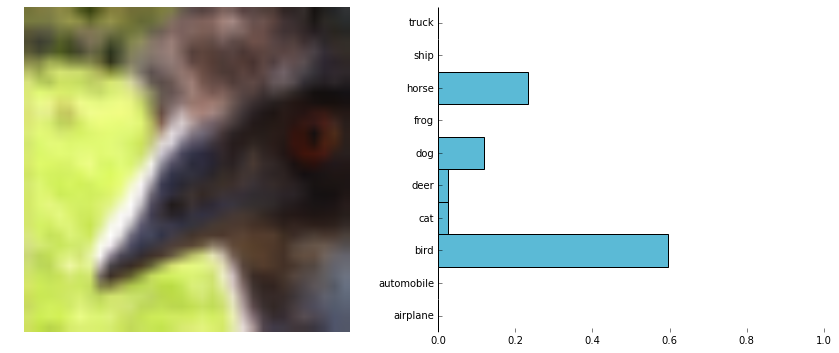

In [84]:
plot_image_prob(y_pred_prob,685)

## Let's Try Images Found on the Web

In [57]:
def plot_image_prob_misc(p,index):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.imshow(misc_array[index])
    ax1.axis('off')
    
    ax2.barh(np.arange(10)+.5 , p[index], align='center', height=1,
             color='#5bbad6')
    
    # Prettify
    ax2.set_yticks(np.arange(10)+.5 );
    ax2.set_yticklabels(classes)
    ax2.set_xlim(left=0, right=1)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')
    
    plt.tight_layout()

In [39]:
img1=mpimg.imread('../data/images/cow_resized.jpg')
img2=mpimg.imread('../data/images/bear_resized.jpg')
img3=mpimg.imread('../data/images/mow_resized.jpg')
img4=mpimg.imread('../data/images/trump_resized.jpg')

In [46]:
misc_array = np.array([img1, img2, img3, img4])

In [48]:
misc_prob = model.predict(misc_array)

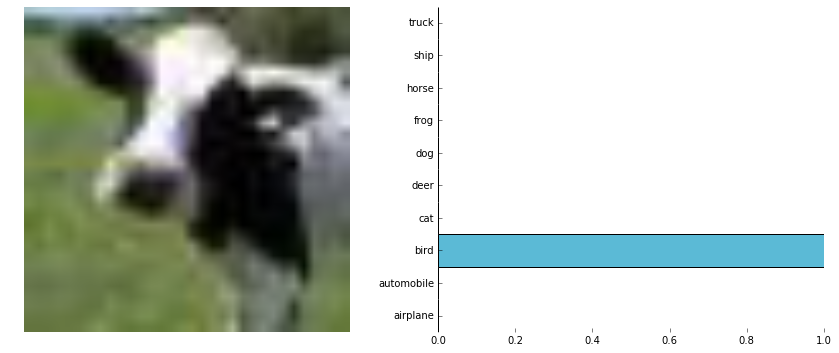

In [58]:
plot_image_prob_misc(misc_prob, 0)

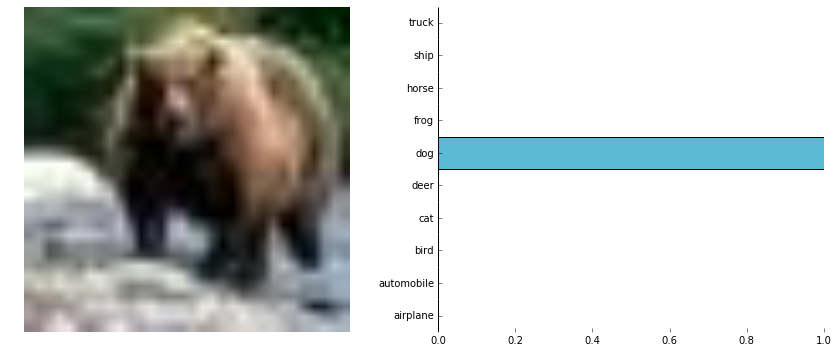

In [59]:
plot_image_prob_misc(misc_prob, 1)

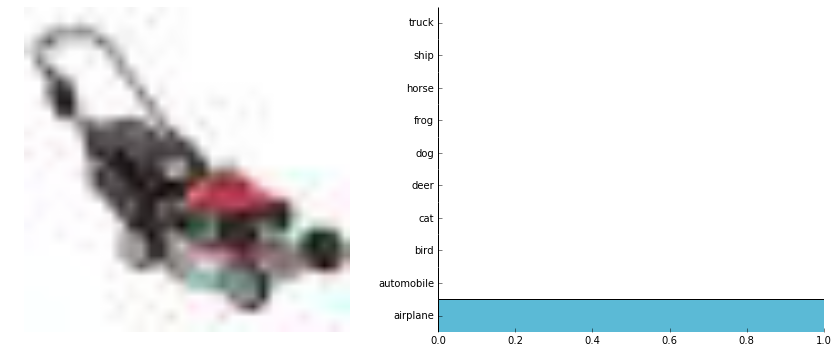

In [53]:
plot_image_prob_misc(misc_prob, 2)

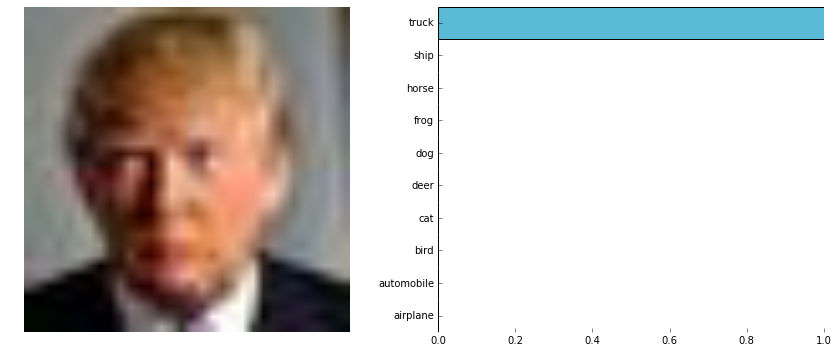

In [54]:
plot_image_prob_misc(misc_prob, 3)